In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# If you want to generate random no. using numpy lib
#you have to use np.random module
experience = np.random.randint(low =2, high = 11, size=500)

(array([48., 48., 48., 62.,  0., 65., 58., 66., 54., 51.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

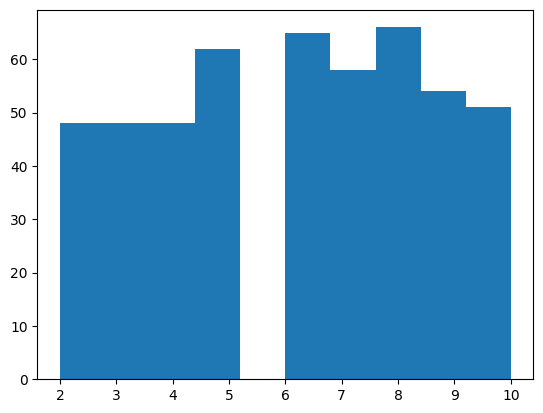

In [3]:
plt.hist(experience)   #to plot frequency histogram

In [4]:
salary = 2*experience + 3 + np.random.normal(loc=0, scale=2, size=500)

In [5]:
salary

array([18.26302885, 15.81789738, 24.31051316,  6.83319767,  3.46397697,
       22.10857554, 15.19086667, 13.43118174, 14.08213753, 12.82928217,
        6.08200189, 20.0293457 , 18.62733742, 16.2738811 ,  7.63806269,
        8.63148978, 20.15977371, 11.9517479 , 15.00598949, 18.55677107,
       22.81792294, 15.32219874, 23.72995411, 21.87267184, 23.9788115 ,
       10.9729086 , 16.5677306 ,  6.118709  ,  9.53039722, 15.31130692,
       19.05844281, 16.55793995, 20.63268572, 20.59654687, 14.23370295,
       21.04325618, 13.09649868, 16.66142696, 13.95172675, 18.92435858,
       17.57092354, 18.40381937, 10.3319892 , 16.06283233,  8.16436908,
       19.70360309, 21.53338999, 23.4639069 , 18.03861422, 16.76018733,
        5.00282178, 18.17330093, 12.26291383, 22.06021394,  9.72293411,
       18.5494541 ,  7.13620853, 17.66910922, 12.81005885, 12.70274857,
       13.57980305, 22.85410647, 15.53506942, 20.39948489, 11.99682037,
       24.58142443, 10.20169487,  7.83819823,  8.48044261, 22.81

Text(0, 0.5, 'Salary(in lakhs)(Y)')

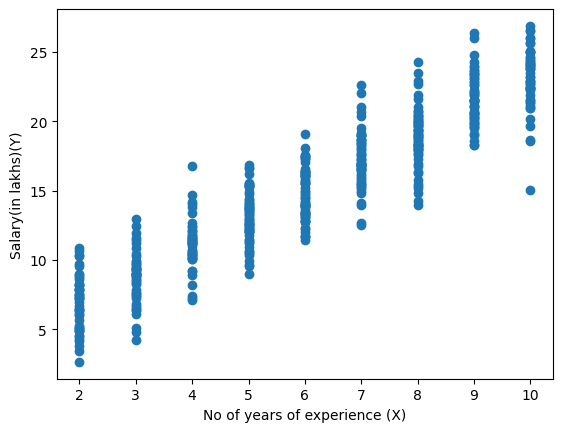

In [6]:
plt.scatter(experience,salary)              # to plot dotted points
plt.xlabel("No of years of experience (X)")          
plt.ylabel("Salary(in lakhs)(Y)")

In [7]:
training_data = pd.DataFrame(data={"X(experience)": experience,"Y(Salary)": salary})

In [8]:
training_data

,X(experience),Y(Salary)
0,9,18.263029
1,6,15.817897
2,8,24.310513
3,3,6.833198
4,2,3.463977
...,...,...
495,5,14.933061
496,4,16.783570
497,8,15.460357
498,6,14.115689


In [9]:
X = np.array(training_data["X(experience)"])
Y = np.array(training_data["Y(Salary)"])

In [10]:
np.shape(X)               #will give you shape pf X
#np.shape(np.expand_dims(X,-1))

(500,)

In [11]:
def nll(theta0,theta1):
    X = np.array(training_data["X(experience)"])
    Y = np.array(training_data["Y(Salary)"])
    
    mu_Y_condition_X = theta0 + (theta1*X)
    squared_error = (Y - mu_Y_condition_X)**2
    mse = np.mean(squared_error)
    return (1/2)*mse

In [12]:
def del_by_del_theta(theta0_initial,theta1_initial):
    
    X = np.array(training_data["X(experience)"])
    Y = np.array(training_data["Y(Salary)"])

    mu_Y_condition_X = (theta0_initial) + (theta1_initial*X)
    error = mu_Y_condition_X-Y
    #error = np.reshape(error,(500,1))                           #to reshape the matrix
    #or
    error = error.reshape(500,1)
    #or
    #error = np.expand_dims(error,-1)
    #error_transpose= error.T                   #to find transpose
    error_transpose = np.transpose(error)
    #print(error_transpose.shape)
    X = np.expand_dims(X,-1)
    #print(X.shape)

    del_by_del_theta1 = (1/error.shape[0])*np.matmul(error_transpose,X)
    del_by_del_theta0 = np.mean(error)
    return [del_by_del_theta0, del_by_del_theta1]

In [13]:
epsilon = 10**(-2)
epoch_counter = 0
theta0_initial = 0
theta1_initial = 0
tol = 10**(-6)

while True:

    initial_gradients = del_by_del_theta(theta0_initial,theta1_initial)

    theta0_final = theta0_initial - (epsilon * initial_gradients[0])
    theta1_final = theta1_initial - (epsilon * initial_gradients[1])

    nll_initial_value = nll(theta0_initial,theta1_initial)
    nll_final_value = nll(theta0_final,theta1_final)

    if abs(nll_initial_value - nll_final_value) < tol:
        break

    epoch_counter += 1

    theta0_initial = theta0_final
    theta1_initial = theta1_final

    print("Epoch # {}, NLL Value = {}".format(epoch_counter,nll_initial_value))

Epoch # 1, NLL Value = 131.81838618937556
Epoch # 2, NLL Value = 42.20126964993418
Epoch # 3, NLL Value = 14.602167195429152
Epoch # 4, NLL Value = 6.102016839622755
Epoch # 5, NLL Value = 3.4835456897987336
Epoch # 6, NLL Value = 2.6763874608502847
Epoch # 7, NLL Value = 2.427039869540344
Epoch # 8, NLL Value = 2.3494767254271958
Epoch # 9, NLL Value = 2.3248181295137247
Epoch # 10, NLL Value = 2.316454047799774
Epoch # 11, NLL Value = 2.3131101178118967
Epoch # 12, NLL Value = 2.311314302419628
Epoch # 13, NLL Value = 2.3099973538157146
Epoch # 14, NLL Value = 2.308829982649492
Epoch # 15, NLL Value = 2.3077107757885114
Epoch # 16, NLL Value = 2.306608496444093
Epoch # 17, NLL Value = 2.305513519217191
Epoch # 18, NLL Value = 2.304422874127234
Epoch # 19, NLL Value = 2.303335640799578
Epoch # 20, NLL Value = 2.302251530068176
Epoch # 21, NLL Value = 2.30117044716858
Epoch # 22, NLL Value = 2.3000923572196443
Epoch # 23, NLL Value = 2.2990172437974845
Epoch # 24, NLL Value = 2.2979450

In [14]:
theta1_final

array([[2.05772987]])

In [15]:
theta0_final

np.float64(2.687910821684371)

In [16]:
predicted_salary = theta1_final*5 + theta0_final

In [17]:
predicted_salary

array([[12.97656017]])